In [9]:
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [10]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [11]:
embeddings = embed([
    "The quick brown fox jumps over the lazy dog.",
    "I want to get an embedding",
    "I want to find an embedding"
])
print(embeddings)

tf.Tensor(
[[-3.1330168e-02 -6.3386343e-02 -1.6075011e-02 ... -3.2427795e-02
  -4.5757405e-02  5.3704556e-02]
 [ 6.3447729e-02 -7.4907422e-02  1.8337060e-02 ... -6.3235313e-03
  -8.7126193e-04 -3.7472900e-02]
 [ 4.2843256e-02 -4.4590678e-02 -2.4835004e-03 ...  3.7239727e-02
   9.6465948e-05 -3.2832187e-02]], shape=(3, 512), dtype=float32)


In [12]:
# From https://colab.research.google.com/github/tensorflow/hub/blob/master/examples/colab/semantic_similarity_with_tf_hub_universal_encoder.ipynb#scrollTo=h1FFCTKm7ba4

def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")

def run_and_plot(messages_):
  message_embeddings_ = embed(messages_)
  plot_similarity(messages_, message_embeddings_, 90)

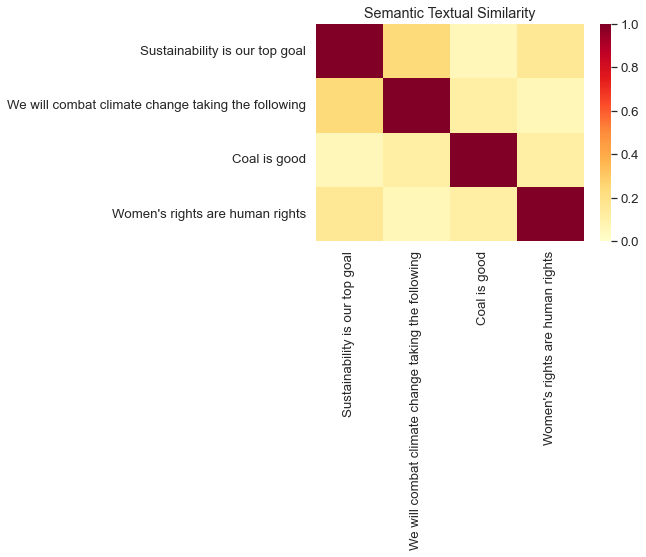

In [13]:
run_and_plot([
    "Sustainability is our top goal",
    "We will combat climate change taking the following",
    "Coal is good",
    "Women's rights are human rights"
])

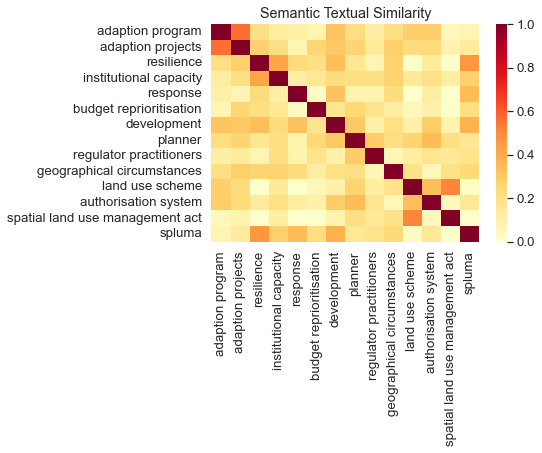

In [15]:
import json


with open("../ndc_keywords/ndc_south_africa.json") as f:
    keywds = json.load(f)

climate_change = keywds['climate change']
embeddings = embed(climate_change)
embeddings
run_and_plot(climate_change)
